<a href="https://colab.research.google.com/github/thehouseisonfire/t1/blob/main/T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estudante/Matrícula**: Pedro Dariva/2111100009

**Estudante/Matrícula**: Pedro Spegiorin/2111100026

# Trabalho T2 - Redes Neurais Convolucionais

Este trabalho tem como objetivo a compreensão de como se dá o processo de treinamento de uma rede neural artificial (RNA) do tipo convolucional. A execução deste exercício permitirá aos estudantes o domínio dos métodos de regularização necessários para o treinamento e, posteriormente, de teste de uma RNA utilizando um dataset pré-processado.

## 1. Instruções

O estudante deve treinar uma RNA com camadas convolucionais e densas, no estilo feedforward, para uma tarefa de classificação utilizando dataset pré-processado conforme especificado abaixo.

Para cada tentativa de construção de arquitetura, mantenha um registro da tentativa e resultado obtido pela rede. Indique qual a lógica utilizada para criação da arquitetura e qual a percepção do resultado em comparação com tentativas anteriores.

Para este trabalho, somente serão permitidas somente as seguintes bibliotecas `python` para o treinamento da RNA:

- `numpy`
- `scipy`
- `tensorflow`
- `scikit-learn`

Para visualização e criação de gráficos, também serão permitidas

- `matplotlib`
- `seaborn`
- `plotly`
- `yellowbrick`

Caso a utilização de quaisquer outras bibliotecas se faça necessária, uma consulta prévia deve ser feita ao professor.


## Entrega

O presente trabalho pode ser feito individualmente ou em dupla. Caso optem pelo trabalho em dupla, o cabeçalho do documento deve indicar quais são os componentes e suas matrículas.

A entrega deverá ser feita através do envio de um arquivo `ZIP` contendo o trabalho dos estudantes, no SIGAA. A data limite para entrega deste trabalho é **22/10/2023, 23h59m**.

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import random as python_random

# canal decore-> input shape
# treinar varias para TESTAR OVER/UNDERFITTING
# usar 0.2 - 0.5 para o dropout
#usar o SGD e ir tomar um cafe pro ultimo treino
# usar camisinha para nao pegar aids
# nao dar o cu pro maluco da esquina
# isso mesmo, muitos cavalos



np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
train, train_info = tfds.load('cifar10', split='train', with_info=True, batch_size=-1)
test, test_info = tfds.load('cifar10', split='test', with_info=True, batch_size=-1)

train = tfds.as_numpy(train)
test = tfds.as_numpy(test)

class_names = [
    'airplane', #0
    'car', #1
    'bird', #2
    'cat', #3
    'deer', #4
    'dog', #5
    'frog', #6
    'horse', #7
    'ship', #8
    'truck', #9
    ]
num_classes = len(class_names)

In [ ]:
x_train, y_train = train["image"], train["label"]
x_test, y_test = test["image"], test["label"]

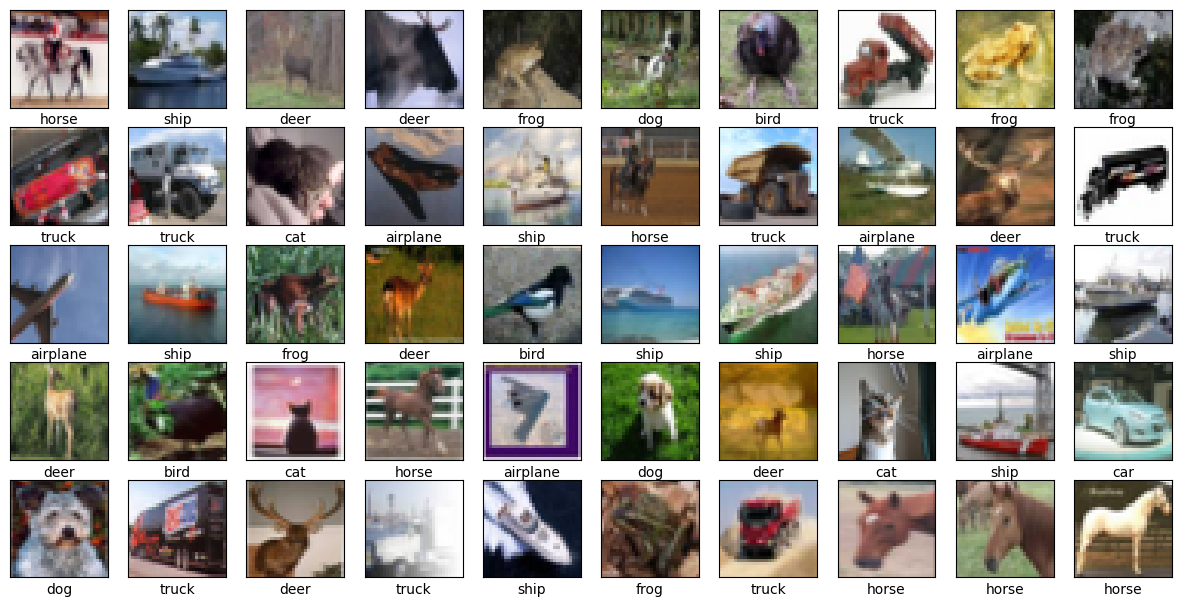

In [ ]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.16, stratify=y_train, random_state=42)

print(x_train.shape[0], 'exemplos de treino')
print(x_val.shape[0], 'exemplos de validação')
print(x_test.shape[0], 'exemplos de teste')


y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

42000 exemplos de treino
8000 exemplos de validação
10000 exemplos de teste


## Inclua seu código abaixo desta célula

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import random as python_random
from sklearn.model_selection import train_test_split


np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)
tf.config.list_physical_devices()


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train, train_info = tfds.load('cifar10', split='train', with_info=True, batch_size=-1)
test, test_info = tfds.load('cifar10', split='test', with_info=True, batch_size=-1)

train = tfds.as_numpy(train)
test = tfds.as_numpy(test)

class_names = [
    'airplane', #0
    'car', #1
    'bird', #2
    'cat', #3
    'deer', #4
    'dog', #5
    'frog', #6
    'horse', #7
    'ship', #8
    'truck', #9
    ]

num_classes = len(class_names)


x_train, y_train = train["image"], train["label"]
x_test, y_test = test["image"], test["label"]
x_train,x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.16, stratify=y_train, random_state=42)

print(x_train.shape[0], 'exemplos de treino')
print(x_val.shape[0], 'exemplos de validação')
print(x_test.shape[0], 'exemplos de teste')


x_train = x_train.reshape(-1, 28, 28, 1)  ## reorganizando o dataset de treino em 50400 exemplos de tamanho 28x28 e 1 canal de cores
x_val = x_val.reshape(-1, 28, 28, 1)  ## reorganizando o dataset de treino em 9600 exemplos de tamanho 28x28 e 1 canal de cores
x_test = x_test.reshape(-1, 28, 28, 1)  ## reorganizando o dataset de teste em 10000 exemplos de tamanho 28x28 e 1 canal de cores
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes) ## transformando os targets do dataset de treino em classes
y_val = tf.keras.utils.to_categorical(y_val, num_classes) ## transformando os targets do dataset de treino em classes
y_test = tf.keras.utils.to_categorical(y_test, num_classes)  ## transformando os targets do dataset de teste em classes


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu',use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(30, activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'))

# exit layer
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()


# aqui utilizaremos a função categorical_crossentropy pois são mais de 2 classes e
# otimizador RMSprop enquanto monitoramos a evolução da acurácia para o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.legacy.RMSprop(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5)])

history = model.fit(x_train, y_train,
                    batch_size=20,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test top-5 accuracy:', score[2])


import seaborn as sns
sns.set()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# acurácia
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Acurácia')
ax1.set(xlabel='epoch', ylabel='accuracy')
ax1.legend(['train', 'test'], loc='upper left')

# loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss')
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(['train', 'test'], loc='upper left')

plt.show()


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

print(f'Acurácia: {accuracy_score(np.argmax(y_test, axis=1), y_pred) * 100:.4f}%')

print('\n\nDemais métricas (separadas por classe): ')
print(classification_report(np.argmax(y_test, axis=1), y_pred))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteHBRPOI/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteHBRPOI/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
42000 exemplos de treino
8000 exemplos de validação
10000 exemplos de teste
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
Total params: 25720 (100.47 KB)
Trainable params: 25720 (100.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________

ValueError: ignored